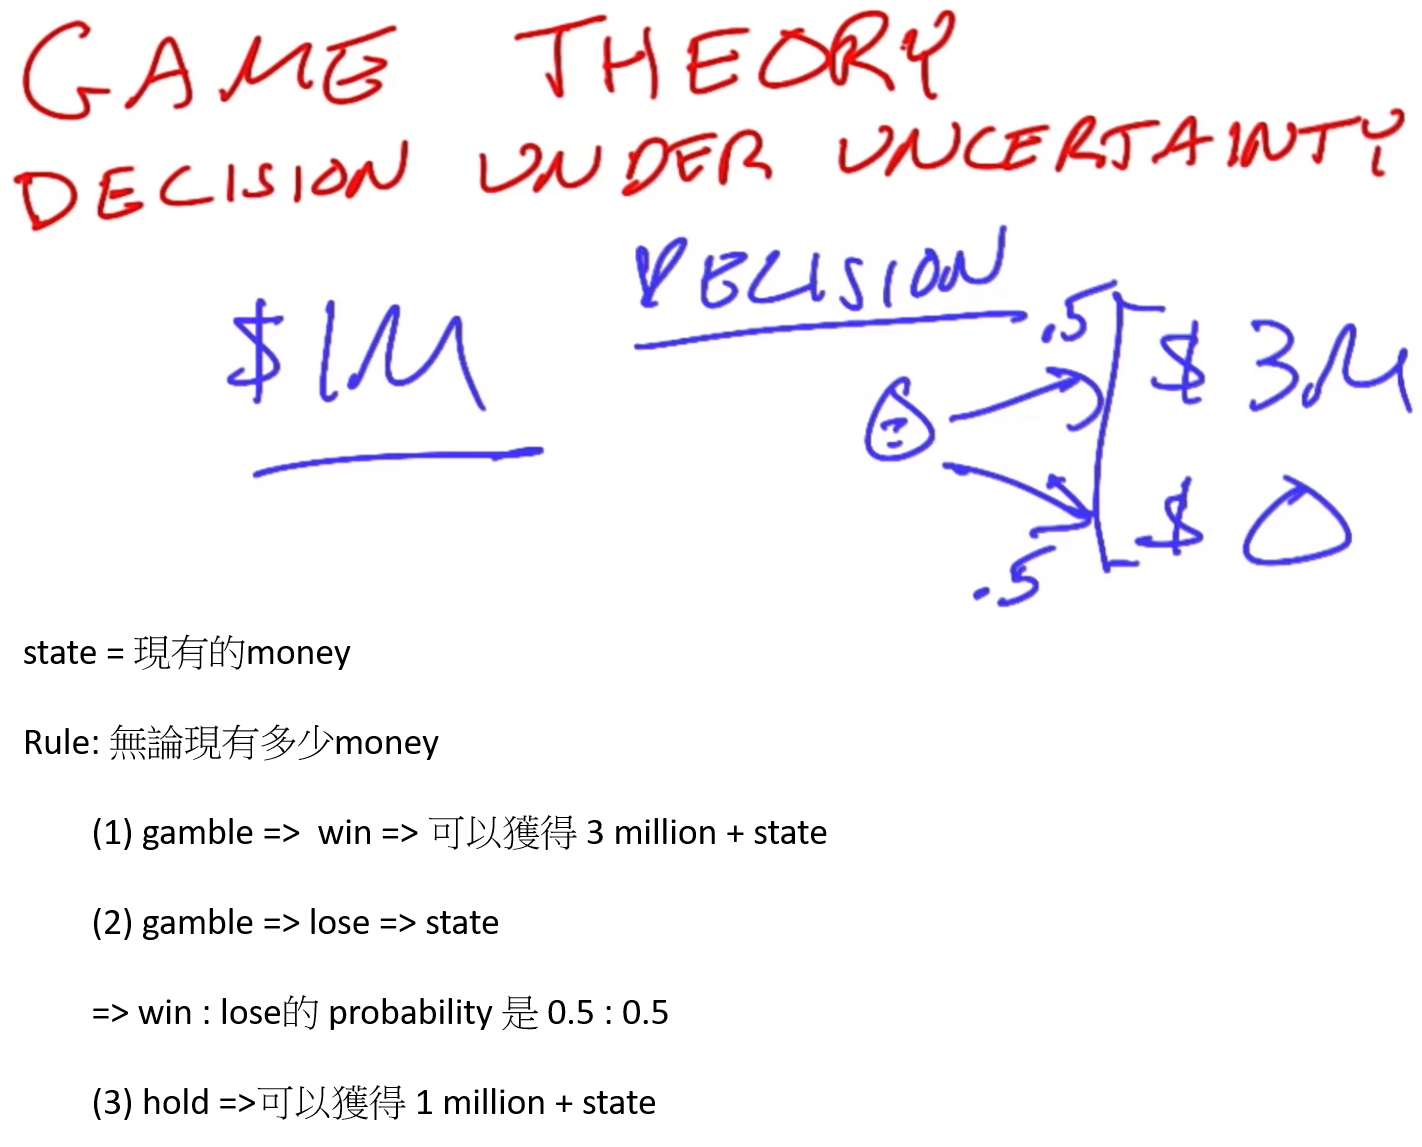

In [1]:
from IPython.display import Image

Image("Desktop\Game Theory.png")

In [3]:
import math

million = 1000000

def Q(state, action , U):
    "The expected value of taking action in state, according utility U"
    
    if action == "hold":
        
        return U(state + 1*million)
    
    if action == "gamble":
        
        return U(state + 3*million) * 0.5 + U(state) * 0.5

def actions(state):
    
    return ["hold", "gamble"]

def identity(x):
    
    return x

U = identity

def best_action(state, actions, Q, U):
    "Return the optimal action for a state, given U"
    
    def expected_U(action):
        
        return Q(state, action, U)
    
    return max(actions(state), key = expected_U)


print (best_action(100, actions, Q, identity))             #現只有$100，U = identity => 人用linear來衡量money
                                                           #實際上不合理，人是用logarithmic來衡量錢
                                                           #所以此return gamble => 不合理

print (best_action(100, actions, Q, math.log))             #現只有$100，U = math.log => 人是用logarithmic來衡量money
                                                           # => 合理 => 所以此return hold
                                                           #因為$100 到 $1 million是 big leap
                                                           # $1 million 到 $3 millions是 small leap
            
print (best_action(10*million, actions, Q, math.log))      #現有$10 millions，U = math.log
                                                           #此return gamble => 合理
                                                           #因為已經有$10 millions => $1 million已經是小錢
                                                           #所以能有贏$3 millions的機會 => 當然gamble

print (Q(million, "hold" , math.log))                      #當有$1 million，U = math.log
print (Q(million, "gamble" , math.log))                    # Q(state, "gamble" , U) & Q(state, "hold" , U)
                                                           #的值相同 => 也就是有$1 million的情況下
                                                           # => 要gamble or hold皆可

gamble
hold
gamble
14.508657738524219
14.508657738524219
